<a href="https://colab.research.google.com/github/JoudAlharthi16/EduMood-Emotion-Recognition/blob/main/Exercises/day_1/Day1_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](https://i.imgur.com/a3uAqnb.png)

## **Goal:** Build a classification model to predict the rarity of pokemon cards (normal vs legendary).

# 1️⃣ Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import kagglehub

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# 2️⃣ Load the Data

In [4]:
# Download dataset
path = kagglehub.dataset_download("rounakbanik/pokemon")
print("Path:", path)

Using Colab cache for faster access to the 'pokemon' dataset.
Path: /kaggle/input/pokemon


In [6]:
# TODO: Load the CSV file into df_pokemon


pokemon_path = os.path.join(path, 'pokemon.csv')
df_pokemon = pd.read_csv(pokemon_path)

print(f"Shape: {df_pokemon.shape}")
df_pokemon.head()

Shape: (801, 41)


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


# 3️⃣ EDA

In [44]:
# TODO: Check the data info
df_pokemon.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [46]:
# TODO: Check the missing values
print(df_pokemon.isnull().sum())

missing_percentage = (df_pokemon.isnull().sum() / len(df_pokemon)) * 100
missing_data = pd.DataFrame({
    'Column': missing_percentage.index,
    'Missing_Percentage': missing_percentage.values
})

missing_data = missing_data[missing_data['Missing_Percentage'] > 0].sort_values('Missing_Percentage', ascending=False)

print("Missing Data Analysis:")
missing_data.head(10)



abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


,Column,Missing_Percentage
37,type2,47.940075
31,percentage_male,12.234707
27,height_m,2.496879
38,weight_kg,2.496879


In [47]:
print(df_pokemon.describe())      # إحصائيات رقمية


       against_bug  against_dark  against_dragon  against_electric  \
count   801.000000    801.000000      801.000000        801.000000   
mean      0.996255      1.057116        0.968789          1.073970   
std       0.597248      0.438142        0.353058          0.654962   
min       0.250000      0.250000        0.000000          0.000000   
25%       0.500000      1.000000        1.000000          0.500000   
50%       1.000000      1.000000        1.000000          1.000000   
75%       1.000000      1.000000        1.000000          1.000000   
max       4.000000      4.000000        2.000000          4.000000   

       against_fairy  against_fight  against_fire  against_flying  \
count     801.000000     801.000000    801.000000      801.000000   
mean        1.068976       1.065543      1.135456        1.192884   
std         0.522167       0.717251      0.691853        0.604488   
min         0.250000       0.000000      0.250000        0.250000   
25%         1.000000    

In [48]:
# TODO: Check for target imbalance
# Hint: the target column is 'is_legendary'
# YOUR CODE HERE
print(df_pokemon['is_legendary'].value_counts())  # توزيع فئة

print(f"Legendary: {df_pokemon['is_legendary'].sum()}")
print(f"Normal: {(df_pokemon['is_legendary'] == 0).sum()}")

is_legendary
0    731
1     70
Name: count, dtype: int64
Legendary: 70
Normal: 731


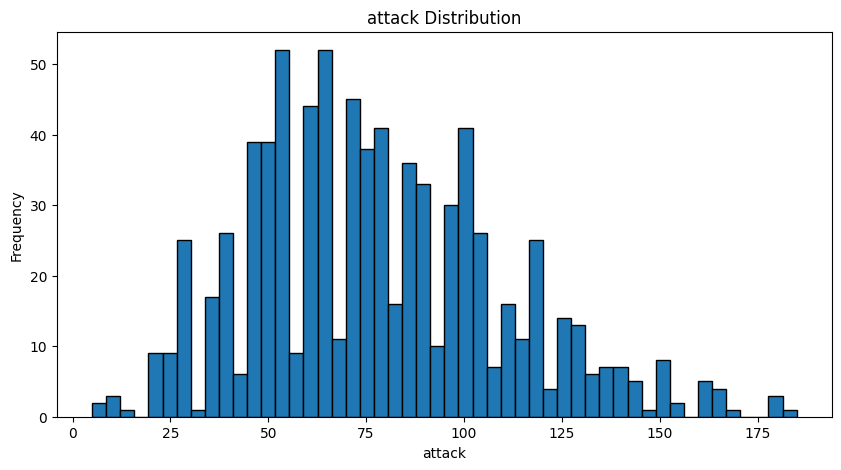

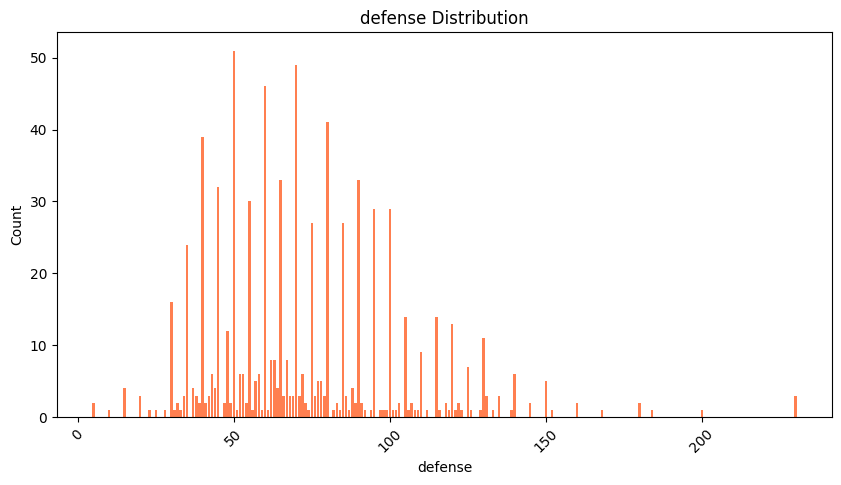

In [32]:
# TODO: Plot distribution of the stats (e.g., 'attack')
# YOUR CODE HERE

plt.figure(figsize=(10, 5))
plt.hist(df_pokemon['attack'].dropna(), bins=50, edgecolor='black')
plt.title('attack Distribution')
plt.xlabel('attack')
plt.ylabel('Frequency')
plt.show()


defense_counts = df_pokemon['defense'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(defense_counts.index, defense_counts.values, color='coral')
plt.title('defense Distribution')
plt.xlabel('defense')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 4️⃣ Data Cleaning

In [49]:
# Define stat columns
stat_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

# TODO: Drop rows with missing values (not encluding 'type2')

print(f"Before: {df_pokemon.shape}")
# Drop rows with missing stat values
df_clean = df_pokemon.dropna(subset=stat_cols).copy()
print(f"Shape after cleaning: {df_clean.shape}")

Before: (801, 41)
Shape after cleaning: (801, 41)


In [37]:
# TODO: Fill missing type2
df_clean['type2'] = df_clean.fillna('no')               # تعبئة القيم المفقودة



ValueError: Cannot set a DataFrame with multiple columns to the single column type2

# 5️⃣ Encode Categorical Variables

In [38]:
# TODO: Encode type1 and type2 using LabelEncoder
le = LabelEncoder()
df_clean['type1'] = le.fit_transform(df_clean['type1'])
df_clean['type2'] = le.fit_transform(df_clean['type2'])

df_clean.head()

KeyError: 'type1'

# 6️⃣ Feature Engineering

In [ ]:
# TODO: Create total_stats feature (sum of all stat columns)
df_clean['total_stats'] = # YOUR CODE HERE

# TODO: Create attack_defense_ratio feature
df_clean['attack_defense_ratio'] = # YOUR CODE HERE

# 7️⃣ Prepare Data

In [40]:
# Define features and target
feature_cols = stat_cols + ['total_stats', 'attack_defense_ratio', 'type1', 'type2']

X = df_clean[feature_cols]
y = df_clean['is_legendary']

# TODO: Split data with stratification (test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # ← للحفاظ على نسب الفئات
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")


KeyError: "['total_stats', 'attack_defense_ratio', 'type1', 'type2'] not in index"

In [41]:
# TODO: Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)        # تعلم + تحويل
X_test_scaled = scaler.transform(X_test)        # تحويل فقط!

print(f"\nScaled ranges - Min: {X_train_scaled.min():.2f}, Max: {X_train_scaled.max():.2f}")
pd.DataFrame(X_train_scaled, columns=X_train.columns).head(3)

NameError: name 'X_train' is not defined

# 8️⃣ Train Model
### Challenge : Try to get > 97% F1 score

In [ ]:
# TODO: Train RandomForestClassifier with class_weight='balanced'
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight='balanced',  # ← مهم للبيانات غير المتوازنة
    random_state=42
)

# YOUR CODE HERE - fit the model
model.fit(X_train_scaled, y_train)


# 9️⃣ Evaluate Model

In [ ]:
# TODO: Make predictions and print accuracy
y_pred = # YOUR CODE HERE


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix

# ========== للتصنيف ==========
accuracy = accuracy_score(y_test, y_pred)      # الدقة العامة
precision = precision_score(y_test, y_pred)    # الدقة للفئة الموجبة
recall = recall_score(y_test, y_pred)          # الاستدعاء
f1 = f1_score(y_test, y_pred)                  # متوسط توافقي

# تقرير مفصل
print(classification_report(y_test, y_pred))



print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Legendary']))

In [ ]:
# TODO: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Normal', 'Legendary'])
plt.yticks([0, 1], ['Normal', 'Legendary'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()